### 3.2 Classification and regression with a two-layer perceptron

#### 3.2.1 Classification of linearly non-separable data

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def error_mse(T, Y):
    #return np.sum((T - Y) ** 2) / 2
    return np.mean(((Y-T)**2))

def accuracy(T, Y):
    #return np.sum((T - Y) ** 2) / 2
    return np.sum(abs(T-Y)/2)/len(T)

def phi(x):
    return 2/(1+np.exp(-x))-1


def phi_prime(x):
    return 0.5*((1+phi(x))*(1-phi(x)))

def forward_pass(X,W,V):
    #print(W.shape)
    #print(X.shape)
    H = phi(np.matmul(W,X))
    #print(H.shape)
    H=np.vstack([H,np.ones(np.shape(H)[1])])
    #print(H.shape)
    #print(V.shape)
    O = phi(np.matmul(V,H))
    #print(O.shape)
    return H,O

def backward_pass(O,T,H,V,hidden):
    delta_o = np.multiply((O-T),phi_prime(O))
    #print("hej hopp")
    #print(V.shape)
    #print(delta_y.shape)
    #print(phi_prime(H).shape)
    delta_h = np.multiply(np.matmul(np.transpose(V),delta_o),phi_prime(H))
    delta_h = delta_h[0:hidden]
    return delta_o, delta_h

def update_weights(X,H,W,V,eta,delta_o, delta_h,dw,dv,alpha):
    dw = alpha*dw-(1-alpha)*np.matmul(delta_h,np.transpose(X))
    dv = alpha*dv - (1-alpha)*np.matmul(delta_o,np.transpose(H))
    W = W + dw*eta
    V = V + dv*eta
    return W,V,dw,dv

def backprop(eta,X,T,W,V,hidden,epochs,alpha=0.9):
    weights1 = []
    weights2 = []
    mse_errors = []
    accuracys = []
    #acc = 0
    dw = np.ones(W.shape)
    dv = np.ones(V.shape)
    #print(eta,X,T,W,V,hidden,epochs)
    for i in range(epochs):
        weights1.append(W)
        weights2.append(V)
        H,O = forward_pass(X,W,V)
        mse = error_mse(T,O)
        mse_errors.append(mse)
        acc = accuracy(T,O)
        accuracys.append(acc)
        delta_o,delta_h = backward_pass(O,T,H,V,hidden)
        W,V,dw,dv = update_weights(X,H,W,V,eta,delta_o,delta_h,dw,dv,alpha)
        #print(H)
        #print("print")
        #print(Y)
        
    weights1.append(W)
    weights2.append(V)
    
    return weights1, weights2,mse_errors,accuracys


In [26]:
eta = 1e-4
n_in = 8
n_out = 8
scale = 1e-2
hidden_perceptrons = 3
epochs = 10000


class_A = np.eye(n_in)
class_A = np.eye(n_in)
for x in np.nditer(class_A, op_flags = ['readwrite']):
    if x == 0:
        x[...] = -1
X = np.vstack([class_A,np.ones(n_in)])
T = np.ones(n_in)
#T[4] = 1
W = scale*np.random.randn(hidden_perceptrons,np.shape(X)[0])
V = scale*np.random.randn(n_out,hidden_perceptrons+1)    
print(X)
print(T)


W_train,V_train,mse,acc = backprop(eta,X,T,W,V,hidden_perceptrons,epochs)
print("mse")
#print(mse)
print("acc")
#print(acc)

[[ 1. -1. -1. -1. -1. -1. -1. -1.]
 [-1.  1. -1. -1. -1. -1. -1. -1.]
 [-1. -1.  1. -1. -1. -1. -1. -1.]
 [-1. -1. -1.  1. -1. -1. -1. -1.]
 [-1. -1. -1. -1.  1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.  1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.  1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.]]
[1. 1. 1. 1. 1. 1. 1. 1.]
mse
acc


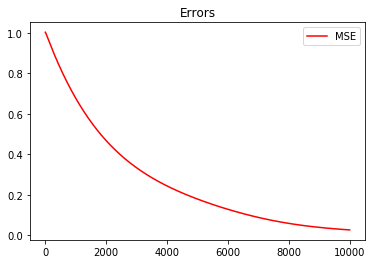

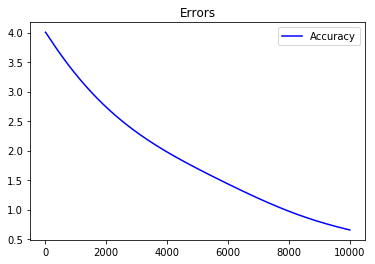

In [27]:
plt_mse, = plt.plot(np.linspace(0,epochs,epochs),mse,'r', label='MSE')
plt.legend(handles=[plt_mse])
#plt.axis([0,20,0,100])
plt.title('Errors')
plt.show()
plt_acc, = plt.plot(np.linspace(0,epochs,epochs),acc,'b',label='Accuracy')
plt.legend(handles=[plt_acc])
plt.title('Errors')
plt.show()